In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pf = pd.read_csv('../Data/data.csv')
columns = pf.columns
pf = pf[[x for x in columns if x != "Question 1: Food frame (1-5)" and x != "Annotated count"]].dropna()
print(pf)

     Unnamed: 0   ID Annotater     video id  Attractive Level (1-5)  \
0             1    1  nghiatnh  5OzrpNCyXqs                     5.0   
1             2    2   hoangnd  5OzrpNCyXqs                     5.0   
2             9    9  nghiatnh  3qfTtx3yG5U                     3.0   
3            11   11      hanl  3qfTtx3yG5U                     4.0   
4            15   15  nghiatnh  rSTBg8w7F8I                     3.0   
..          ...  ...       ...          ...                     ...   
239         711  671     haitm  HEYLbIedh9s                     2.0   
240         712  672     Lamnh  HEYLbIedh9s                     2.0   
241         713  673    taidpa  HEYLbIedh9s                     2.0   
242         721  679     haitm  dGU9wkhW-Ms                     3.0   
243         722  680    taidpa  dGU9wkhW-Ms                     3.0   

     Question 2: Sound (1-5)  Question 2.1: Music (1-5)  \
0                        5.0                          4   
1                        5.0 

7      1.0
23     1.0
43     1.0
100    1.0
121    1.0
126    1.0
127    1.0
145    1.0
195    1.0
216    1.0
225    1.5
Name: Attractive Level (1-5), dtype: float64


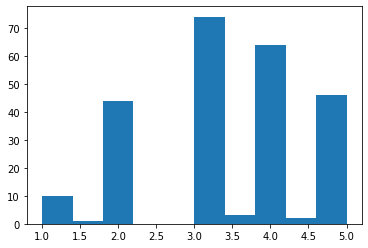

In [3]:
plt.hist(pf["Attractive Level (1-5)"])
a = pf["Attractive Level (1-5)"]
print(pf["Attractive Level (1-5)"][a < 2])

In [4]:
# for x in pf.columns:
#     try:
#         plt.plot(pf[x],pf["Attractive Level (1-5)"], 'ro')
#         plt.show()
#     except:
#         pass

In [5]:
columns = [
       'Question 2: Sound (1-5)', 'Question 2.1: Music (1-5)',
       'Question 2.2 : Noise control (1-5)',
       'Question 2.3 : Speaking Style (1-5)', 'Question 3: Camera (1-5)',
       'Question 3.1: Stable (1-5)', 'Question 3.2: Angel diversity (0-1)',
       'Question 4: Images (1-5)', 'Question 4.1: Resolution (1-5)',
       'Question 4.2: Color (1-5)', 'Question 5: Content (1-5)',
       'Question 5.1: Introduction (0-1)',
       'Question 5.2: Food description (0-1)', 'Question 6: Reviewer (1-5)',
       'Question 6.1: Reviewer emotion is negative - neutral - positive (1-3)',
       'Question 6.2: Recommendation (0-1)',
       'Question 6.3: Clear information (0-1)']
core_columns = [
       'Question 2: Sound (1-5)','Question 3: Camera (1-5)',
       'Question 4: Images (1-5)', 'Question 5: Content (1-5)',
       'Question 6: Reviewer (1-5)',]
output_column = 'Attractive Level (1-5)'

In [6]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
X = np.array(pf[[x for x in columns if not x in core_columns]][:130])
Y = np.array(pf[output_column][:130])
model = model.fit(X[:100], Y[:100])
print(model.predict(X[:10]))
print(Y[:10])
print(model.score(X[:30], Y[:30]))

[3. 3. 2. 4. 2. 3. 3. 2. 2. 2.]
[5. 5. 3. 4. 3. 3. 4. 1. 2. 2.]
0.36666666666666664


In [7]:
nghiatnh = pf[pf['Annotater'] == 'nghiatnh']
hoangnd = pf[pf['Annotater'] == 'hoangnd']
hanl = pf[pf['Annotater'] == 'hanl']

In [8]:
import pingouin as pg
icc = pg.intraclass_corr(data=pf[['video id', 'Annotater', 'Attractive Level (1-5)']][:100], targets='video id', raters='Annotater',
                         ratings='Attractive Level (1-5)',nan_policy='omit')
print(icc)

    Type              Description       ICC         F  df1  df2          pval  \
0   ICC1   Single raters absolute  0.636317  6.248948   31   64  3.474903e-10   
1   ICC2     Single random raters  0.642427  7.274286   31   62  2.196565e-11   
2   ICC3      Single fixed raters  0.676525  7.274286   31   62  2.196565e-11   
3  ICC1k  Average raters absolute  0.839973  6.248948   31   64  3.474903e-10   
4  ICC2k    Average random raters  0.843503  7.274286   31   62  2.196565e-11   
5  ICC3k     Average fixed raters  0.862529  7.274286   31   62  2.196565e-11   

          CI95%  
0  [0.45, 0.79]  
1  [0.45, 0.79]  
2   [0.5, 0.81]  
3  [0.71, 0.92]  
4  [0.71, 0.92]  
5  [0.75, 0.93]  


/home/nghiatnh/anaconda3/lib/python3.8/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sserror = grp.apply(lambda x: (x - x.mean()) ** 2).sum()
/home/nghiatnh/anaconda3/lib/python3.8/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., grou

In [9]:
icc = pg.intraclass_corr(data=pf[['video id', 'Annotater', 'Attractive Level (1-5)']][102:109], targets='video id', raters='Annotater',
                         ratings='Attractive Level (1-5)',nan_policy='omit')
print(icc)

    Type              Description       ICC     F  df1  df2      pval  \
0   ICC1   Single raters absolute  0.826087  10.5    2    3  0.044194   
1   ICC2     Single random raters  0.833333  21.0    2    2  0.045455   
2   ICC3      Single fixed raters  0.909091  21.0    2    2  0.045455   
3  ICC1k  Average raters absolute  0.904762  10.5    2    3  0.044194   
4  ICC2k    Average random raters  0.909091  21.0    2    2  0.045455   
5  ICC3k     Average fixed raters  0.952381  21.0    2    2  0.045455   

          CI95%  
0  [-0.21, 1.0]  
1   [-0.1, 1.0]  
2   [-0.3, 1.0]  
3  [-0.53, 1.0]  
4  [-0.22, 1.0]  
5  [-0.86, 1.0]  


/home/nghiatnh/anaconda3/lib/python3.8/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sserror = grp.apply(lambda x: (x - x.mean()) ** 2).sum()
/home/nghiatnh/anaconda3/lib/python3.8/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., grou

In [10]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X[30:130], Y[30:130])
print(clf.score(X[:30], Y[:30]))
print(clf.predict(X[:10]))
print(Y[:10])

0.5
[5. 4. 3. 4. 4. 4. 5. 1. 1. 1.]
[5. 5. 3. 4. 3. 3. 4. 1. 2. 2.]
